In [1]:
# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv2DTranspose 
from tensorflow.keras.layers import concatenate
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2DTranspose , Conv2D

In [2]:
import pathlib 
data_dir='C://Users/chih-cheng/Desktop/ETT_v3'
data_dir=pathlib.Path(data_dir)
print(data_dir)

C:\Users\chih-cheng\Desktop\ETT_v3


In [3]:
Fold1=list(data_dir.glob('Fold1/*/*'))
Fold2=list(data_dir.glob('Fold2/*/*'))
Fold3=list(data_dir.glob('Fold3/*/*'))
Fold4=list(data_dir.glob('Fold4/*/*'))
Fold5=list(data_dir.glob('Fold5/*/*'))

In [4]:
test=list(data_dir.glob('Fold2/test/*'))
trainannot=list(data_dir.glob('Fold2/trainannot/*'))
train=list(data_dir.glob('Fold2/train/*'))
testannot=list(data_dir.glob('Fold2/testannot/*'))
val=list(data_dir.glob('Fold2/val/*'))
valannot=list(data_dir.glob('Fold2/valannot/*'))

In [5]:
print(train)
print(trainannot)

[WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/a0.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A00010.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000100.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000110.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000120.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000130.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000140.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000160.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A00020.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000200.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000210.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000220.jpg'), WindowsPath('C:/Users/chih-cheng/Desktop/ETT_v3/Fold2/train/A000230.jpg'), WindowsPath('C:/Users/chih-chen

In [6]:
from skimage import io, transform
import cv2
from PIL import Image
data_path='C://Users/chih-cheng/Desktop/ETT_v3/Fold2/train/'
label_path='C://Users/chih-cheng/Desktop/ETT_v3/Fold2/trainannot/'
val_path='C://Users/chih-cheng/Desktop/ETT_v3/Fold2/val/'
vallabel_path='C://Users/chih-cheng/Desktop/ETT_v3/Fold2/valannot/'
test_path='C://Users/chih-cheng/Desktop/ETT_v3/Fold2/test/'
testlabel_path='C://Users/chih-cheng/Desktop/ETT_v3/Fold2/testannot/'
def read_img(path):
  imgs=[]
  newimg=[]
  path1=os.listdir(path)
  path1.sort()
  for filename in path1:
    img=load_img(path+filename,target_size=(256,256))
    # img=Image.open(path+filname)
    # print(path+filename)
    img_arr=np.array(img)
    isannot=path.split("/")[7]
    if(isannot=='trainannot' or isannot=='testannot' or isannot=='valannot'):
      # img1 = img_arr.convert("L")
      img1=cv2.cvtColor(img_arr,cv2.COLOR_RGB2GRAY)
      img2=np.expand_dims(img1, axis=-1)
      imgs.append(img2)
    else:
      imgs.append(img_arr)
  return np.asarray(imgs, np.float32) 

In [7]:
data=read_img(data_path)
label=read_img(label_path)
val=read_img(val_path)
val_label=read_img(vallabel_path)
test=read_img(test_path)
test_label=read_img(testlabel_path)

In [8]:
print(val_label.shape)
print(label.shape)
print(test_label.shape)
print(data.shape)
print(val.shape)
print(test.shape)

(47, 256, 256, 1)
(287, 256, 256, 1)
(47, 256, 256, 1)
(287, 256, 256, 3)
(47, 256, 256, 3)
(47, 256, 256, 3)


In [9]:
data=data/255
label=label/255
val=val/255
val_label=val_label/255
test=test/255
test_label=test_label/255

In [10]:
np.max(val)

1.0

(287, 256, 256, 1)


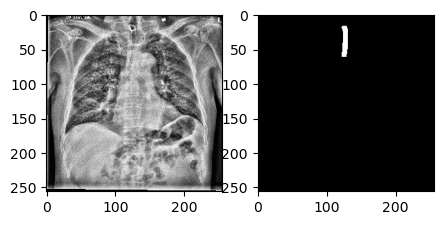

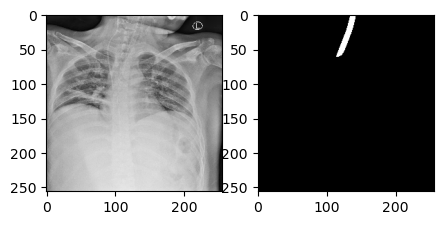

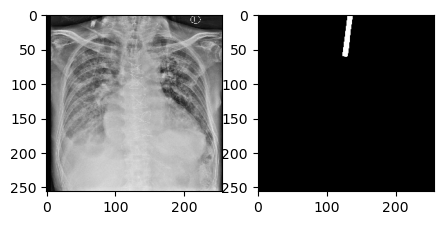

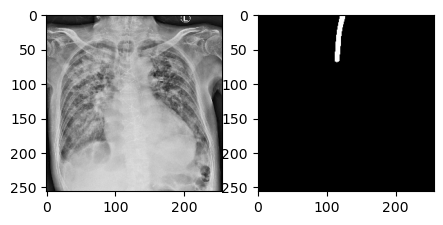

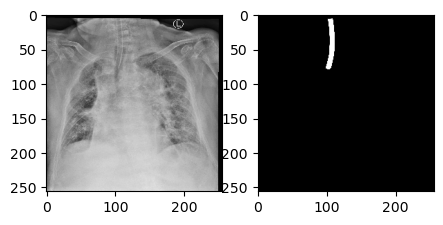

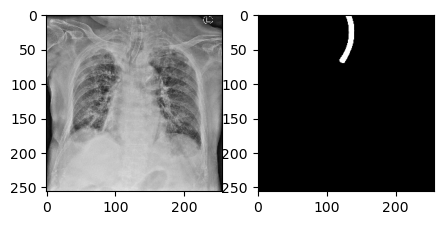

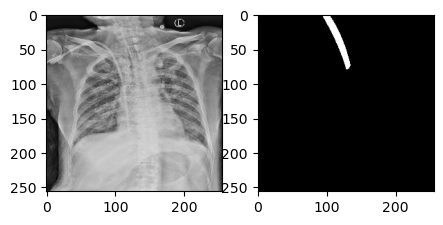

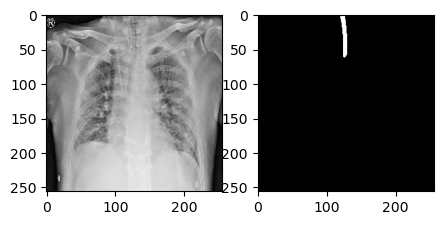

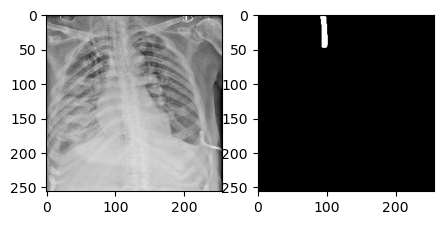

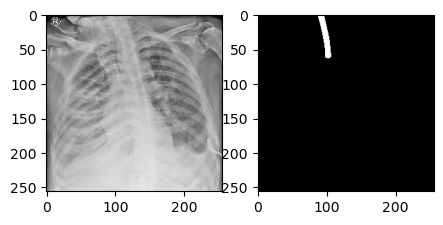

In [11]:
im = label[:,:,:,0]
print(label.shape)
for x in range(0,10):
  plt.figure(figsize=(5,5))
  plt.subplot(1,2,1)
  plt.imshow(data[x],cmap='gray')
  plt.subplot(1,2,2)
  plt.imshow(im[x],cmap='gray')
  plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     horizontal_flip=True)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
seed = 1
image_datagen.fit(data,augment=True,seed=seed)
mask_datagen.fit(label,augment=True,seed=seed)
image_generator = image_datagen.flow(
    data,
    save_to_dir='C://Users/chih-cheng/Desktop/ETT_v3/newtrain',
    save_format='jpg',
    batch_size=2,
    seed=seed)
mask_generator = mask_datagen.flow(
    label,
    save_to_dir='C://Users/chih-cheng/Desktop/ETT_v3/newtrain',
    save_format='jpg',
    save_prefix='mask_',
    batch_size=2,
    seed=seed)
# # 将生成器组合成一个产生图像和蒙版（mask）的生成器
train_generator = zip(image_generator, mask_generator)

imgval_datagen = ImageDataGenerator()
imglabel_datagen = ImageDataGenerator()

imgval_datagen.fit(val,augment=False,seed=seed)
imglabel_datagen.fit(val_label,augment=False,seed=seed)
# 明明沒有給他東西但他還是有輸出,why?或是其實他是train_gen的東西
imgval_generator = imgval_datagen.flow(
    val,
    save_to_dir='C://Users/chih-cheng/Desktop/ETT_v3/newval',
    save_format='jpg',
    batch_size=2,
    seed=seed)
vallabel_generator = imglabel_datagen.flow(
    val_label,
    save_to_dir='C://Users/chih-cheng/Desktop/ETT_v3/newval',
    save_format='jpg',
    save_prefix='mask_',
    batch_size=2,
    seed=seed)
val_generator = zip(imgval_generator,vallabel_generator)

In [13]:
from keras import backend as K
def dice_coef(y_true,y_pred,smooth=100):
  y_true_f=K.flatten(y_true)
  y_pred_f=K.flatten(y_pred)
  intersection=K.sum(y_pred_f*y_true_f)
  return(2.*intersection+smooth)/(K.sum(y_true_f)+K.sum(y_pred_f)+smooth)
def dice_coef_loss(y_true,y_pred):
  return 1-dice_coef(y_true,y_pred)

In [14]:
## IOU in pure numpy
def numpy_iou(y_true, y_pred, n_class=2):
    def iou(y_true, y_pred, n_class):
        # IOU = TP/(TP+FN+FP)
        IOU = []
        for c in range(n_class):
            TP = np.sum((y_true == c) & (y_pred == c))
            FP = np.sum((y_true != c) & (y_pred == c))
            FN = np.sum((y_true == c) & (y_pred != c))

            n = TP
            d = float(TP + FP + FN + 1e-12)

            iou = np.divide(n, d)
            IOU.append(iou)

        return np.mean(IOU)

    batch = y_true.shape[0]
    y_true = np.reshape(y_true, (batch, -1))
    y_pred = np.reshape(y_pred, (batch, -1))

    score = []
    for idx in range(batch):
        iou_value = iou(y_true[idx], y_pred[idx], n_class)
        score.append(iou_value)
    return np.mean(score)

In [15]:
# Calculating IOU across a range of thresholds, then we will mean all the
## values of IOU's.
## this function can be used as keras metrics

def numpy_mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.5):
        y_pred_ = tf.cast(y_pred > t, tf.int32)
        score = tf.numpy_function(numpy_iou, [y_true, y_pred_], tf.float64)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [16]:
def unet(input_size=(256,256,3),base_filter_num=64):
  inputs=Input(input_size)
  conv1=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(inputs)
  conv1=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv1)
  pool1=MaxPooling2D(pool_size=(2,2))(conv1)
  
  conv2=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool1)
  conv2=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv2)
  pool2=MaxPooling2D(pool_size=(2,2))(conv2)

  conv3=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool2)
  conv3=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv3)
  pool3=MaxPooling2D(pool_size=(2,2))(conv3)

  conv4=Conv2D(base_filter_num*8,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool3)
  conv4=Conv2D(base_filter_num*8,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv4)
  pool4=MaxPooling2D(pool_size=(2,2))(conv4)

  conv5=Conv2D(base_filter_num*16,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool4)
  conv5=Conv2D(base_filter_num*16,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv5)

  up6=Conv2DTranspose(base_filter_num*8,(2,2),strides=(2,2),padding='same')(conv5)
  merge6=concatenate([conv4,up6],axis=-1)
  conv6=Conv2D(base_filter_num*8,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge6)
  conv6=Conv2D(base_filter_num*8,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv6)
  
  up7=Conv2DTranspose(base_filter_num*4,(2,2),strides=(2,2),padding='same')(conv6)
  merge7=concatenate([conv3,up7],axis=-1)
  conv7=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge7)
  conv7=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv7)

  up8=Conv2DTranspose(base_filter_num*2,(2,2),strides=(2,2),padding='same')(conv7)
  merge8=concatenate([conv2,up8],axis=-1)
  conv8=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge8)
  conv8=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv8)
  
  up9=Conv2DTranspose(base_filter_num,(2,2),strides=(2,2),padding='same')(conv8)
  merge9=concatenate([conv1,up9],axis=-1)
  conv9=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge9)
  conv9=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv9)
  conv10=Conv2D(1,1,activation='sigmoid')(conv9)
  model=Model(inputs=inputs,outputs=conv10)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=[numpy_mean_iou])
#   model.summary()
  return model
  

In [17]:
model = unet(input_size=(256,256,3),base_filter_num=64)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss', patience=5, 
                      mode='min', verbose=1)
checkpoint = ModelCheckpoint('model-Unet.h5', verbose=1,
                              monitor='val_loss', save_best_only=True,save_weights_only=True,
                              mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                           patience=2, mode='min', verbose=1,
                           min_lr=1e-4)

In [29]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv2DTranspose 
from tensorflow.keras.layers import concatenate
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2DTranspose , Conv2D
# fit沒有steps_per
# 資料生成器會不斷地循環下去，所以需要手動設定停止條件steps_per_epoch和validation_steps
history=model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=287//2,
    validation_steps=47//2,
    epochs=20,
    callbacks=[checkpoint, earlystop, reduce_lr]
    )

Epoch 1/20
143/143 [==============================] - ETA: 0s - loss: 0.0088 - numpy_mean_iou: 0.7949
Epoch 1: val_loss did not improve from 0.00838
143/143 [==============================] - 14s 99ms/step - loss: 0.0088 - numpy_mean_iou: 0.7949 - val_loss: 0.0088 - val_numpy_mean_iou: 0.8126 - lr: 1.0000e-04
Epoch 2/20
143/143 [==============================] - ETA: 0s - loss: 0.0090 - numpy_mean_iou: 0.7976
Epoch 2: val_loss improved from 0.00838 to 0.00824, saving model to model-Unet.h5
143/143 [==============================] - 15s 102ms/step - loss: 0.0090 - numpy_mean_iou: 0.7976 - val_loss: 0.0082 - val_numpy_mean_iou: 0.8210 - lr: 1.0000e-04
Epoch 3/20
143/143 [==============================] - ETA: 0s - loss: 0.0085 - numpy_mean_iou: 0.8058
Epoch 3: val_loss did not improve from 0.00824
143/143 [==============================] - 15s 105ms/step - loss: 0.0085 - numpy_mean_iou: 0.8058 - val_loss: 0.0087 - val_numpy_mean_iou: 0.8231 - lr: 1.0000e-04
Epoch 4/20
143/143 [==========

In [30]:
tf.keras.utils.plot_model(unet(), to_file='/model.jpg')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [31]:
y_pred=model.predict(test)

2/2 [==============================] - 8s 3s/step


In [32]:
threshold = 0.5
for i, mask in enumerate(y_pred):
    mask[mask < threshold] = 0
    mask[mask >= threshold] = 1
    y_pred[i] = mask

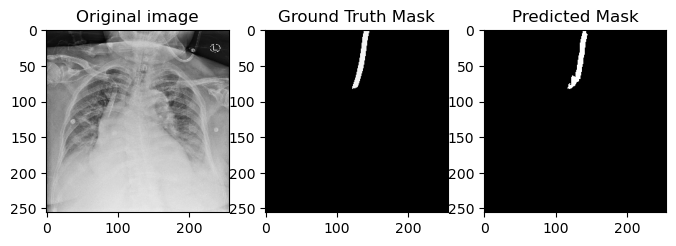

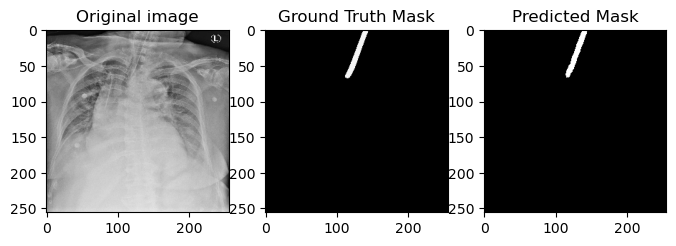

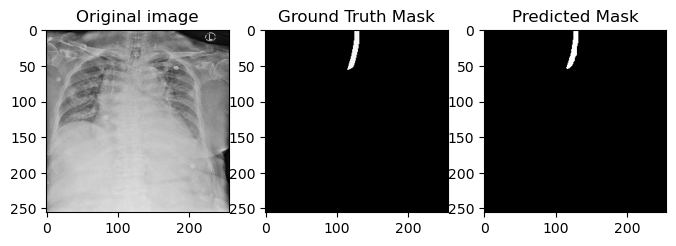

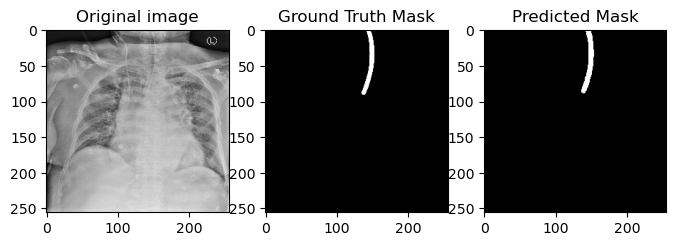

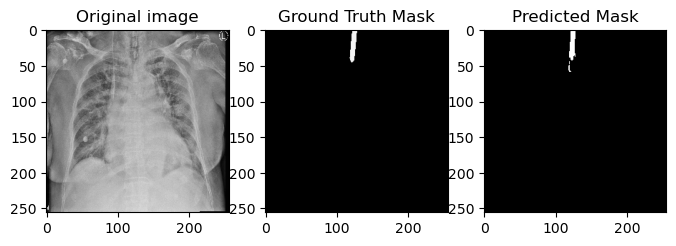

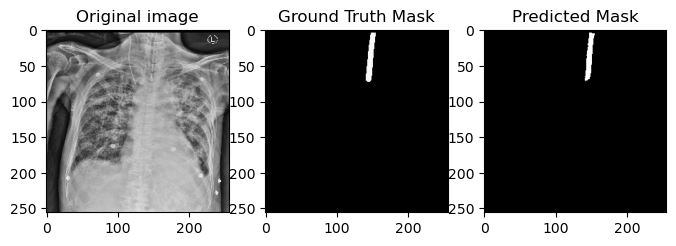

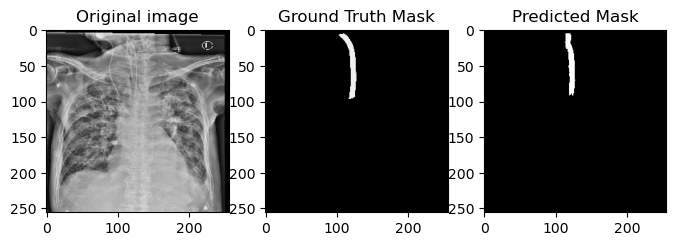

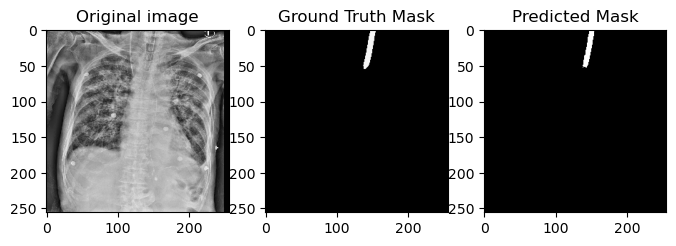

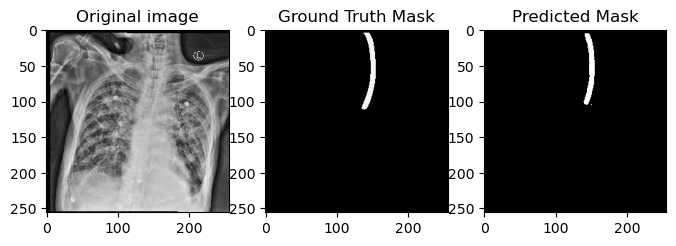

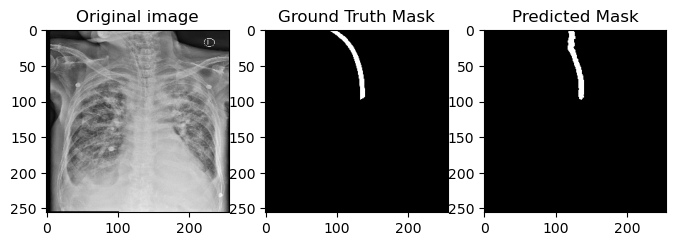

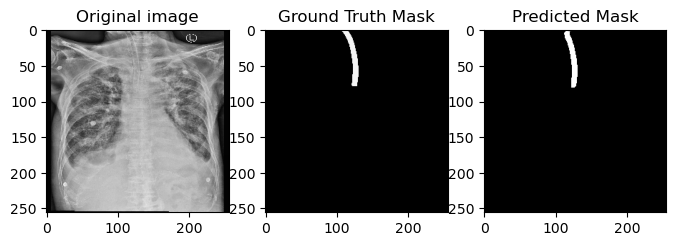

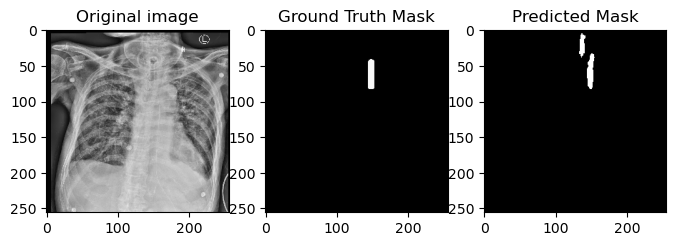

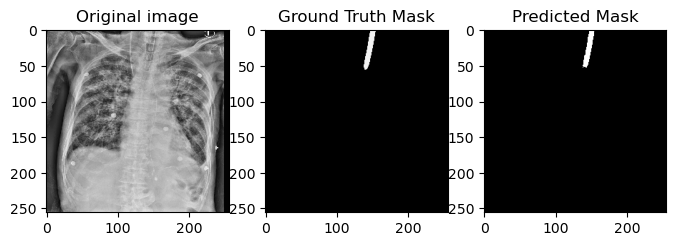

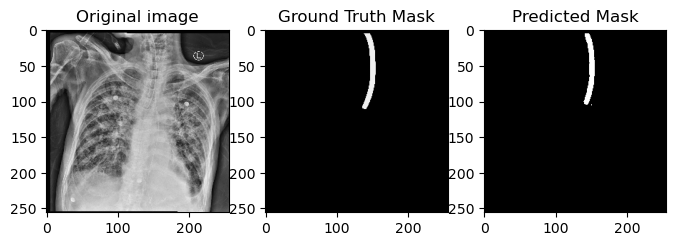

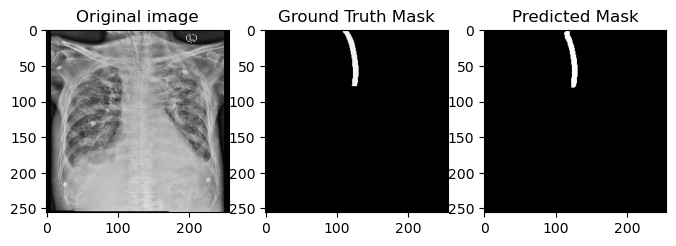

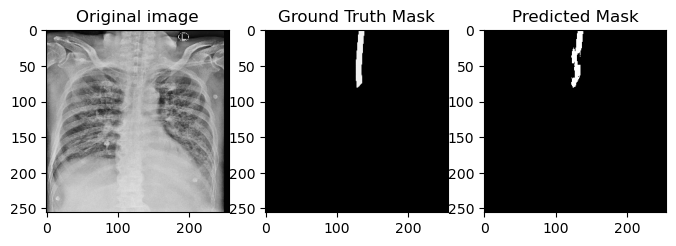

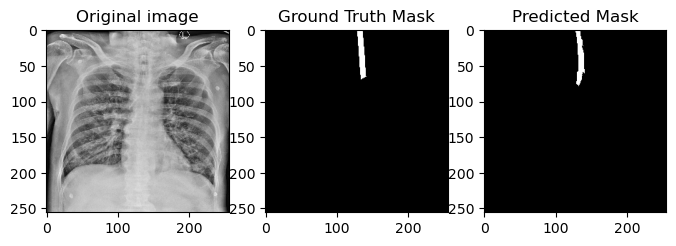

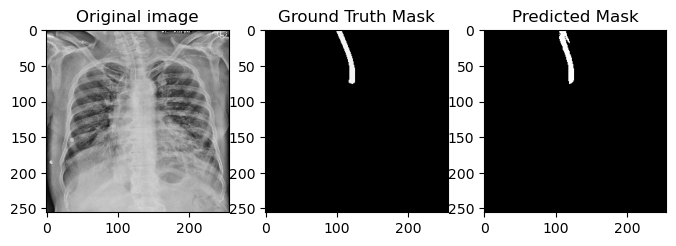

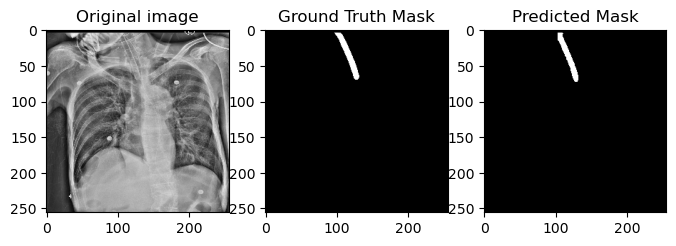

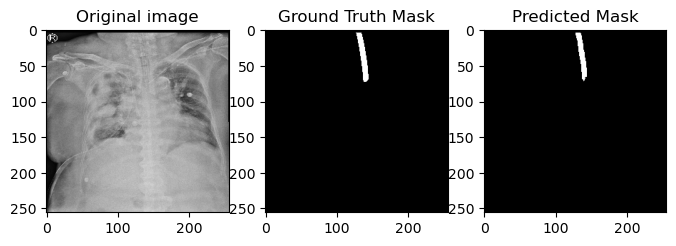

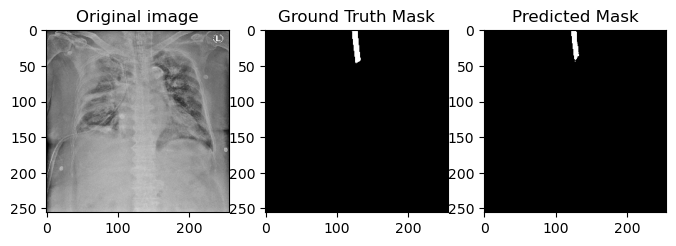

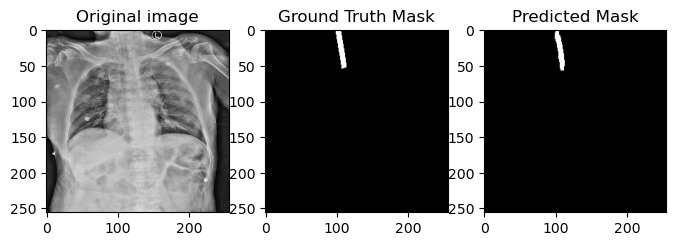

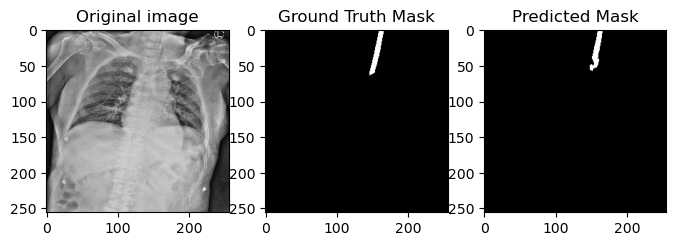

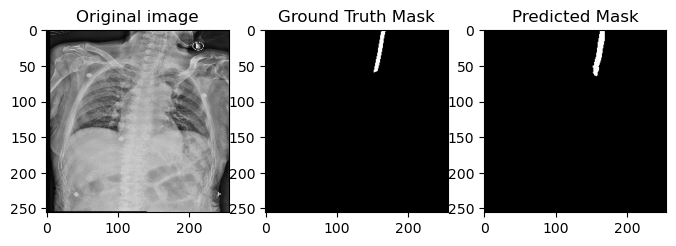

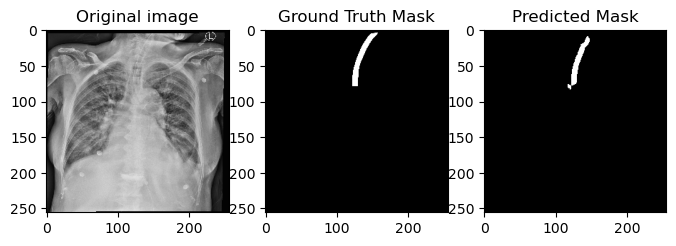

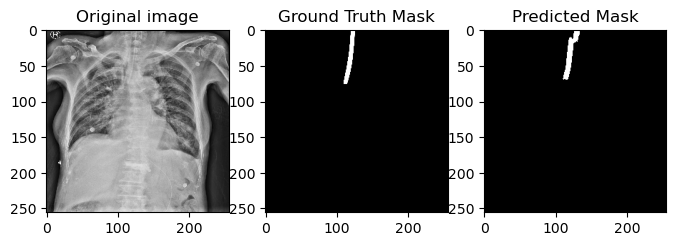

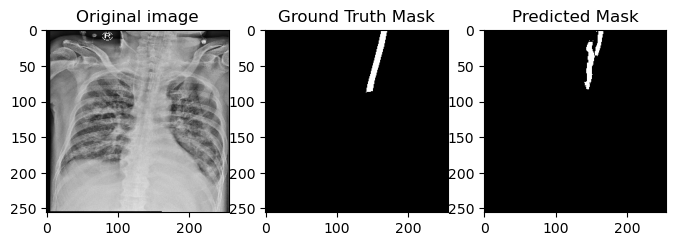

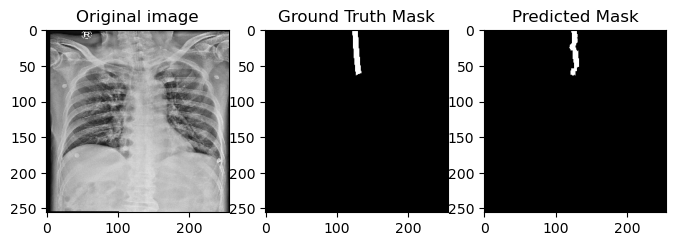

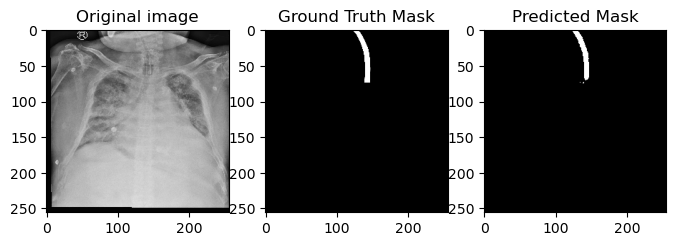

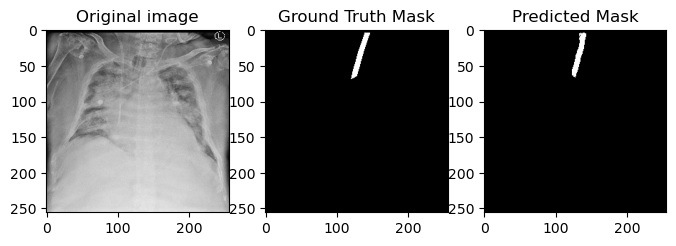

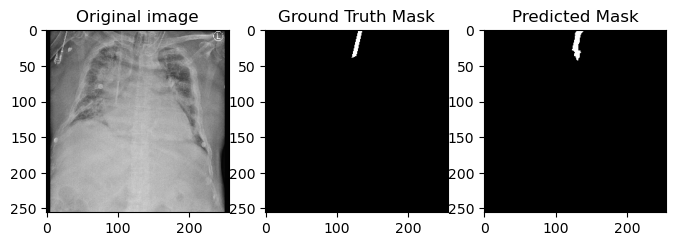

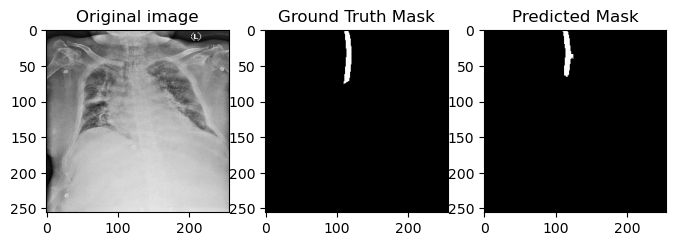

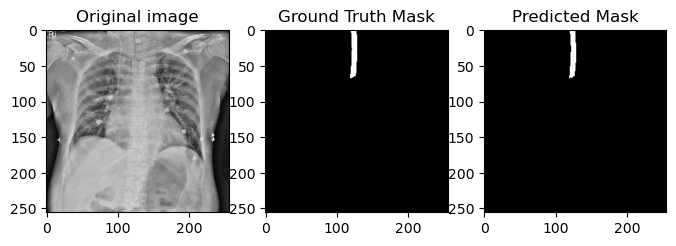

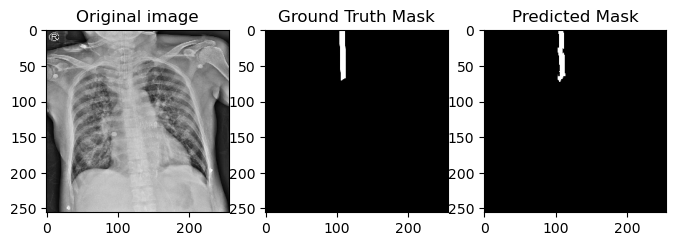

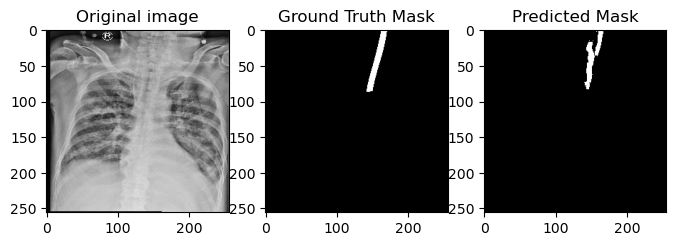

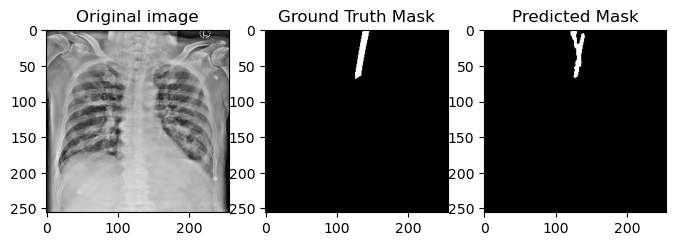

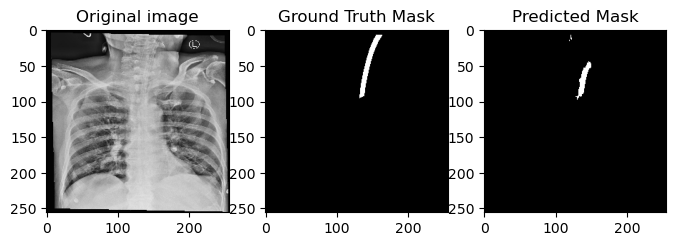

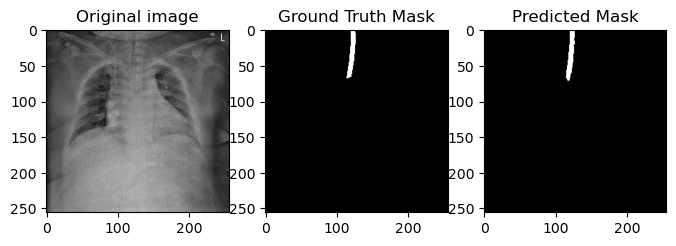

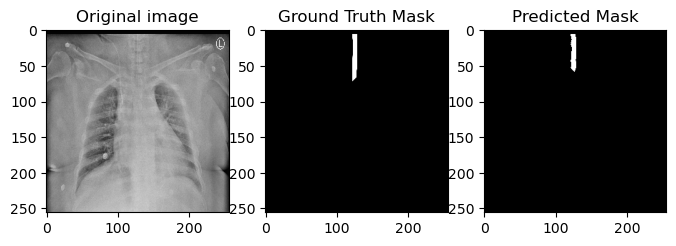

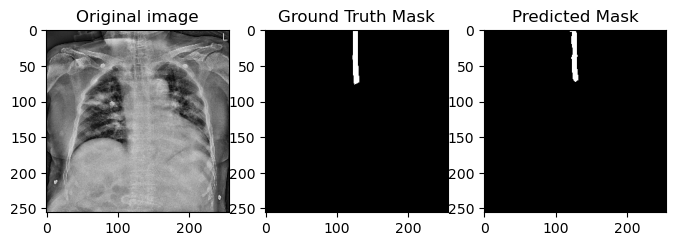

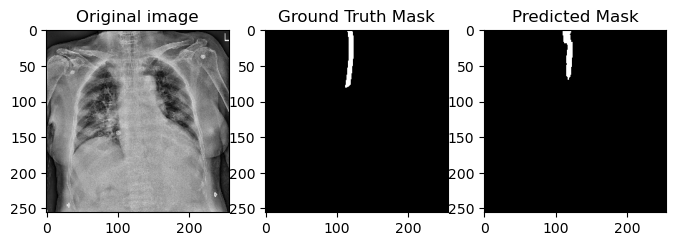

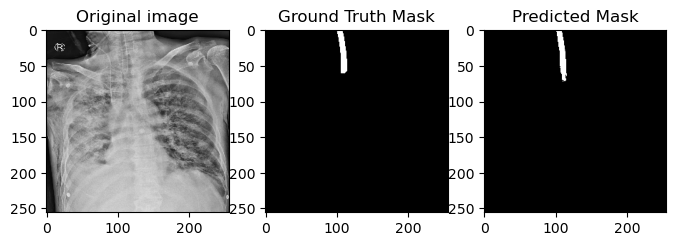

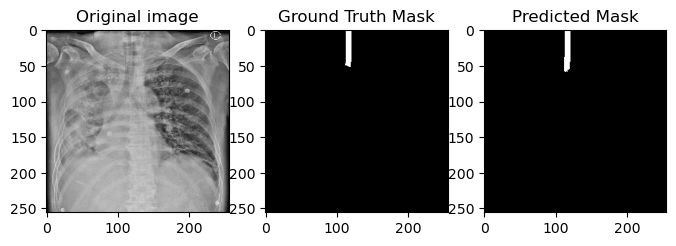

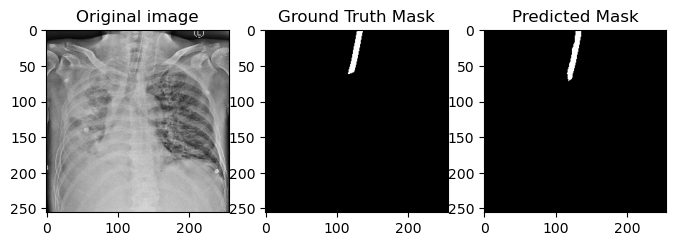

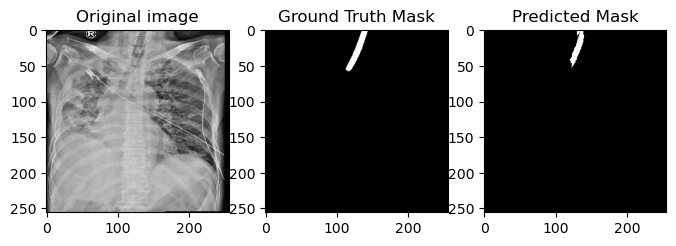

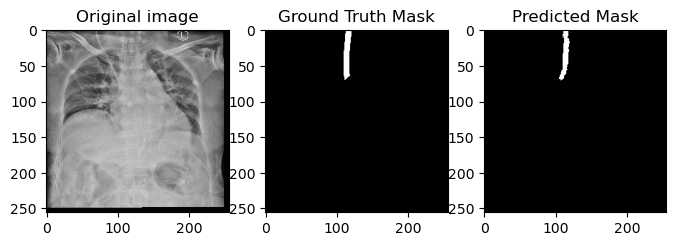

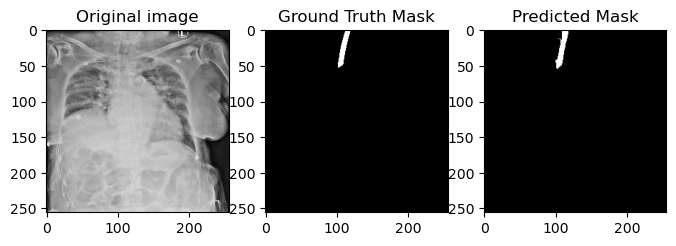

In [33]:
for i in range(len(y_pred)):
  plt.figure(figsize=(8,8))
  plt.subplot(1,3,1)
  plt.imshow(test[i],cmap='gray')
  plt.title('Original image')
  
  plt.subplot(1,3,2)
  plt.imshow(test_label[i][:,:,0],cmap='gray')
  plt.title('Ground Truth Mask')

  plt.subplot(1,3,3)
  plt.imshow(y_pred[i][:,:,0],cmap='gray')
  plt.title('Predicted Mask')
  plt.show()

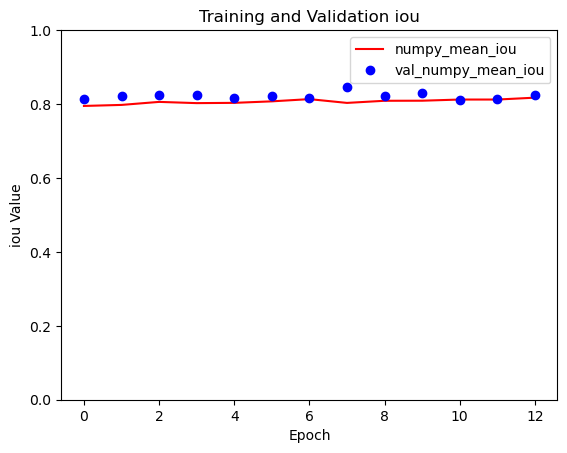

In [34]:
loss = history.history['numpy_mean_iou']
val_loss = history.history['val_numpy_mean_iou']

plt.figure()
plt.plot(history.epoch, loss, 'r', label='numpy_mean_iou')
plt.plot(history.epoch, val_loss, 'bo', label='val_numpy_mean_iou')
plt.title('Training and Validation iou')
plt.xlabel('Epoch')
plt.ylabel('iou Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [25]:
def unet_plus_plus(input_size=(256,256,3),base_filter_num=64):
  inputs=Input(input_size)
  conv0_0=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(inputs)
  conv0_0=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv0_0)
  pool1=MaxPooling2D(pool_size=(2,2))(conv0_0)
  
  conv1_0=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool1)
  conv1_0=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv1_0)
  pool2=MaxPooling2D(pool_size=(2,2))(conv1_0)
  
  up1_0=Conv2DTranspose(base_filter_num,(2,2),strides=(2,2),padding='same')(conv1_0)
  print(conv0_0,up1_0)
  merge00_10=concatenate([conv0_0,up1_0],axis=-1)
  conv0_1=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge00_10)
  conv0_1=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv0_1)
  
  conv2_0=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool2)
  conv2_0=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv2_0)
  pool3=MaxPooling2D(pool_size=(2,2))(conv2_0)  
  
  up2_0=Conv2DTranspose(base_filter_num*2,(2,2),strides=(2,2),padding='same')(conv2_0)
  print(conv1_0,up2_0)
  merge10_20=concatenate([conv1_0,up2_0],axis=-1)
  conv1_1=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge10_20)
  conv1_1=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv1_1)

  up1_1=Conv2DTranspose(base_filter_num,(2,2),strides=(2,2),padding='same')(conv1_1)
  merge01_11=concatenate([conv0_0,conv0_1,up1_1],axis=-1)
  conv0_2=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge01_11)
  conv0_2=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv0_2)

  conv3_0=Conv2D(base_filter_num*8,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool3)
  conv3_0=Conv2D(base_filter_num*8,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv3_0)
  pool4=MaxPooling2D(pool_size=(2,2))(conv3_0)

  up3_0=Conv2DTranspose(base_filter_num*4,(2,2),strides=(2,2),padding='same')(conv3_0)
  merge20_30=concatenate([conv2_0,up3_0],axis=-1)
  conv2_1=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge20_30)
  conv2_1=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv2_1)
  
  up2_1=Conv2DTranspose(base_filter_num*2,(2,2),strides=(2,2),padding='same')(conv2_1)
  merge11_21=concatenate([conv1_0,conv1_1,up2_1],axis=-1)
  conv1_2=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge11_21)
  conv1_2=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv1_2)

  up1_2=Conv2DTranspose(base_filter_num,(2,2),strides=(2,2),padding='same')(conv1_2)
  merge02_12=concatenate([conv0_0,conv0_1,conv0_2,up1_2],axis=-1)
  conv0_3=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge02_12)
  conv0_3=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv0_3)

  conv4_0=Conv2D(base_filter_num*16,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool4)
  conv4_0=Conv2D(base_filter_num*16,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv4_0)
  
  up4_0=Conv2DTranspose(base_filter_num*8,(2,2),strides=(2,2),padding='same')(conv4_0)
  merge30_40=concatenate([conv3_0,up4_0],axis=-1)
  conv3_1=Conv2D(base_filter_num*8,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge30_40)
  conv3_1=Conv2D(base_filter_num*8,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv3_1)

  up3_1=Conv2DTranspose(base_filter_num*4,(2,2),strides=(2,2),padding='same')(conv3_1)
  merge21_31=concatenate([conv2_0,conv2_1,up3_1],axis=-1)
  conv2_2=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge21_31)
  conv2_2=Conv2D(base_filter_num*4,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv2_2)

  up2_2=Conv2DTranspose(base_filter_num*2,(2,2),strides=(2,2),padding='same')(conv2_2)
  merge12_22=concatenate([conv1_0,conv1_1,conv1_2,up2_2],axis=-1)
  conv1_3=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge12_22)
  conv1_3=Conv2D(base_filter_num*2,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv1_3)
  
  up1_3=Conv2DTranspose(base_filter_num,(2,2),strides=(2,2),padding='same')(conv1_3)
  merge03_13=concatenate([conv0_0,conv0_1,conv0_2,up1_3],axis=-1)
  conv0_4=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(merge03_13)
  conv0_4=Conv2D(base_filter_num,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv0_4)
  
  conv0_4=Conv2D(1,1,activation='sigmoid')(conv0_4)
  model=Model(inputs=inputs,outputs=conv0_4)
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='binary_crossentropy',metrics=[numpy_mean_iou])
#   model.summary()
  return model
  

In [26]:
model = unet_plus_plus(input_size=(256,256,3),base_filter_num=64)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 64), dtype=tf.float32, name=None), name='conv2d_39/Relu:0', description="created by layer 'conv2d_39'") KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 64), dtype=tf.float32, name=None), name='conv2d_transpose_8/BiasAdd:0', description="created by layer 'conv2d_transpose_8'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 128), dtype=tf.float32, name=None), name='conv2d_41/Relu:0', description="created by layer 'conv2d_41'") KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 128), dtype=tf.float32, name=None), name='conv2d_transpose_9/BiasAdd:0', description="created by layer 'conv2d_transpose_9'")


In [28]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv2DTranspose 
from tensorflow.keras.layers import concatenate
from tensorflow.keras import Model
history=model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=287//2,
    validation_steps=47//2,
    epochs=20,
    callbacks=[checkpoint, earlystop, reduce_lr]
    )

Epoch 1/20
143/143 [==============================] - ETA: 0s - loss: 0.0103 - numpy_mean_iou: 0.7840
Epoch 1: val_loss did not improve from 0.00935
143/143 [==============================] - 15s 104ms/step - loss: 0.0103 - numpy_mean_iou: 0.7840 - val_loss: 0.0097 - val_numpy_mean_iou: 0.8011 - lr: 1.0000e-04
Epoch 2/20
143/143 [==============================] - ETA: 0s - loss: 0.0104 - numpy_mean_iou: 0.7793
Epoch 2: val_loss improved from 0.00935 to 0.00899, saving model to model-Unet.h5
143/143 [==============================] - 17s 121ms/step - loss: 0.0104 - numpy_mean_iou: 0.7793 - val_loss: 0.0090 - val_numpy_mean_iou: 0.7998 - lr: 1.0000e-04
Epoch 3/20
143/143 [==============================] - ETA: 0s - loss: 0.0099 - numpy_mean_iou: 0.7778
Epoch 3: val_loss did not improve from 0.00899
143/143 [==============================] - 16s 114ms/step - loss: 0.0099 - numpy_mean_iou: 0.7778 - val_loss: 0.0109 - val_numpy_mean_iou: 0.7952 - lr: 1.0000e-04
Epoch 4/20
143/143 [=========

In [ ]:
# unet_plus_plus().load_weights('segm_model_v0.h5')
y_pred = model.predict(test)
# predict_generator()来自数据生成器的输入样本生成预测
# predict()为输入样本生成输出预测

In [35]:
threshold = 0.5
for i, mask in enumerate(y_pred):
    mask[mask < threshold] = 0
    mask[mask >= threshold] = 1
    y_pred[i] = mask

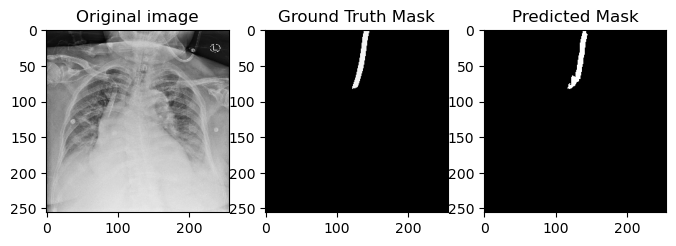

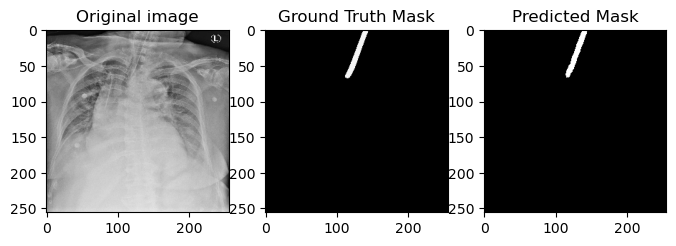

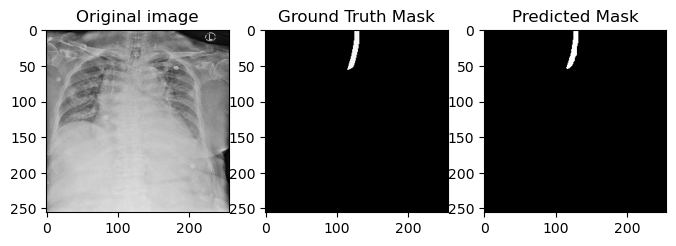

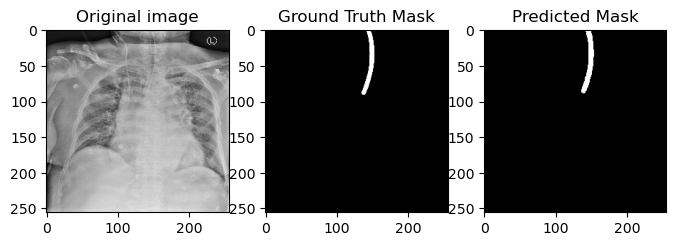

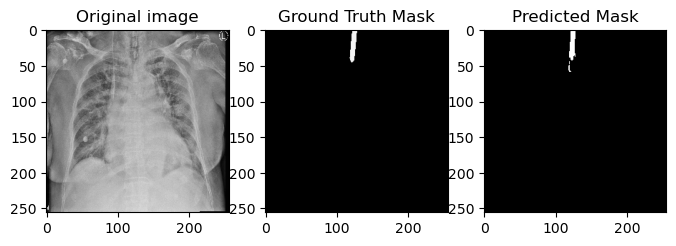

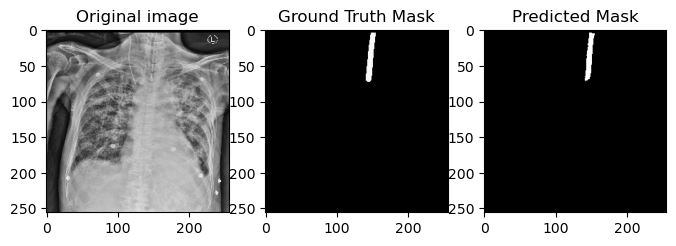

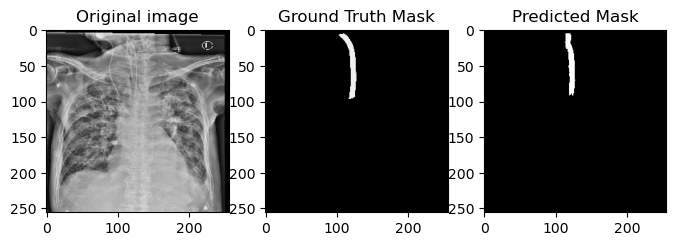

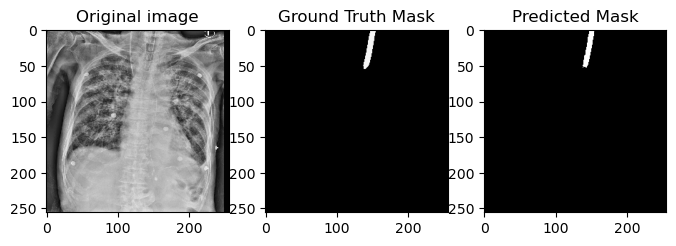

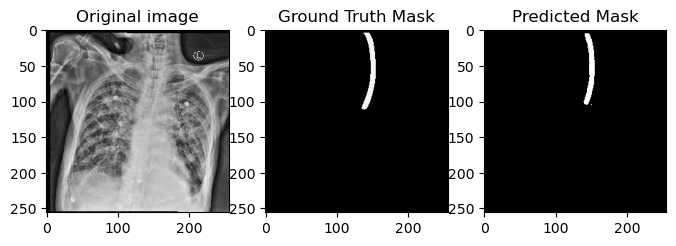

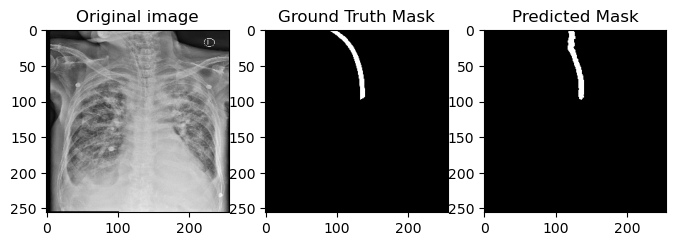

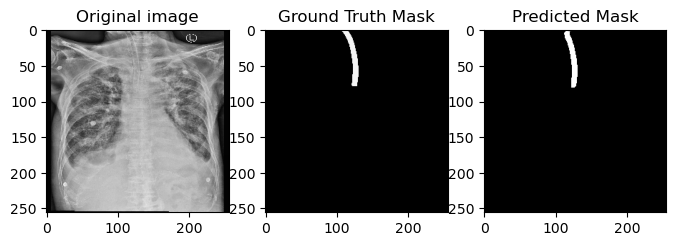

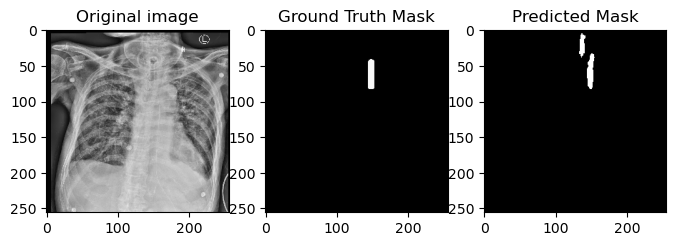

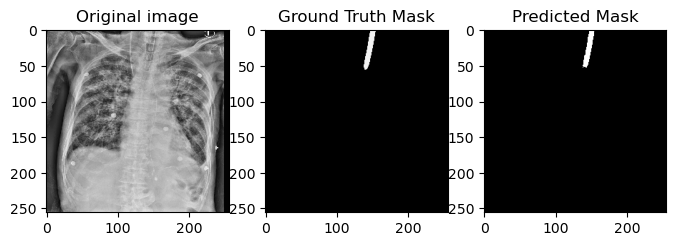

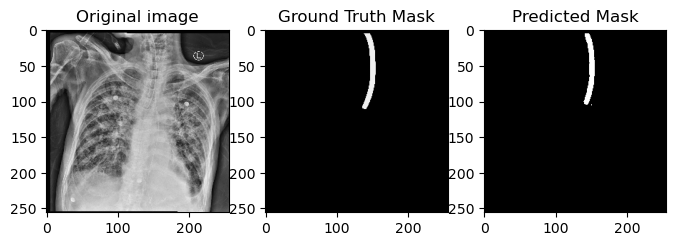

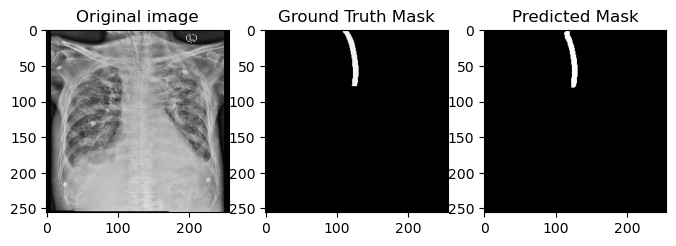

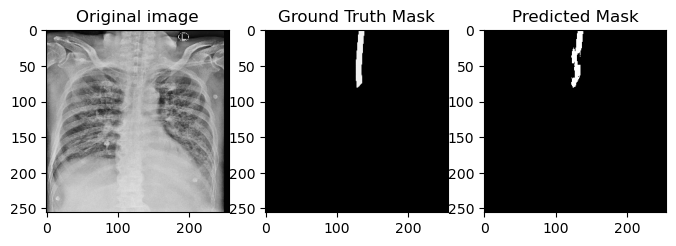

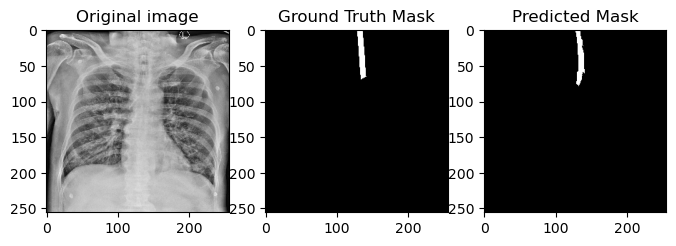

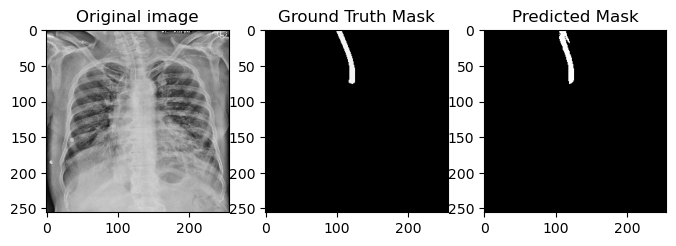

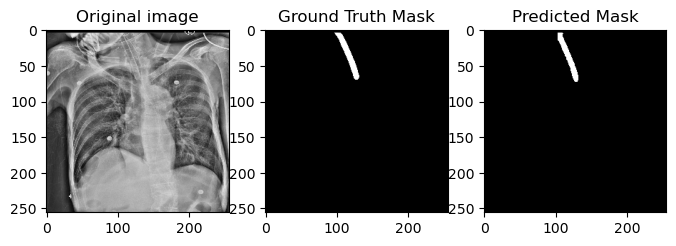

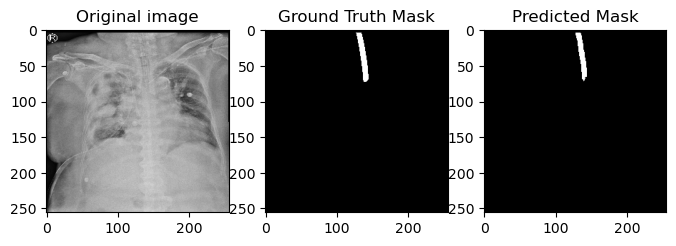

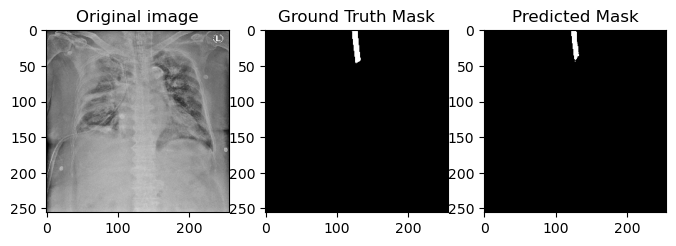

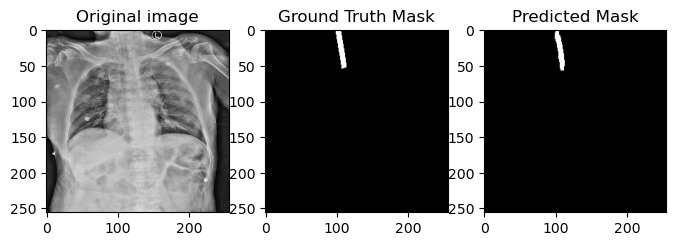

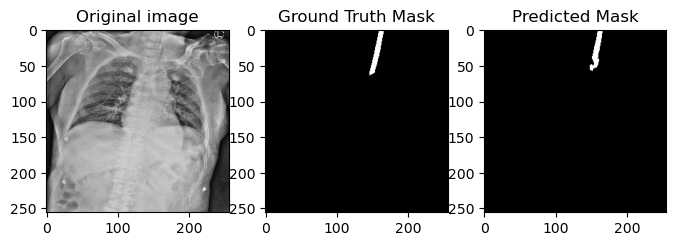

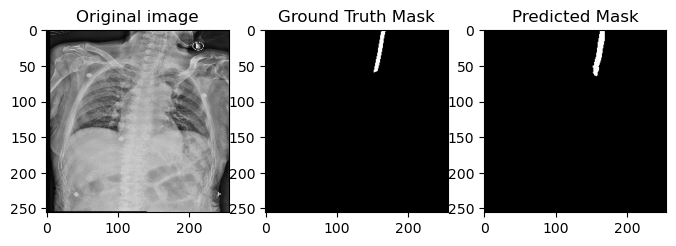

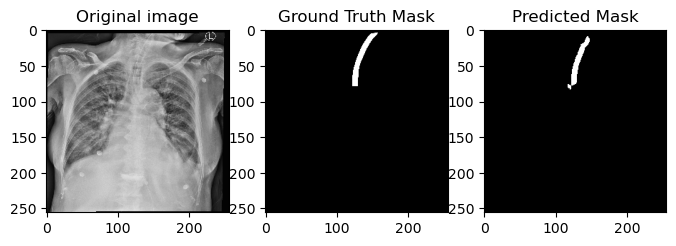

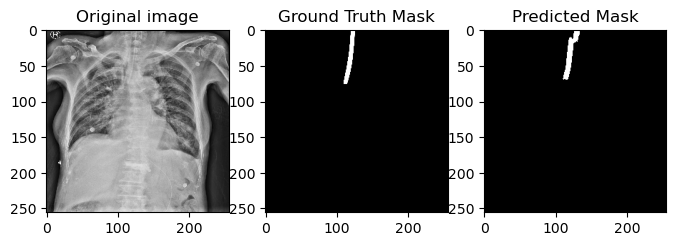

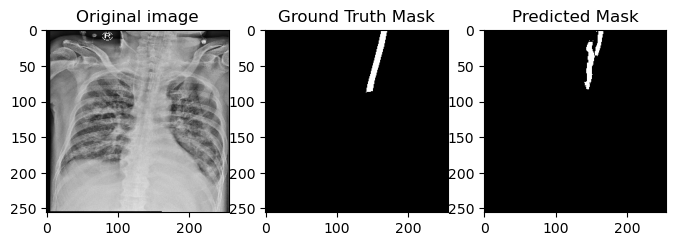

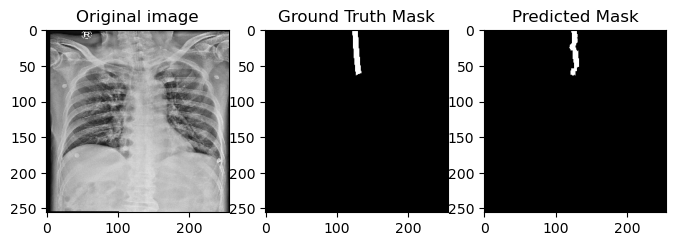

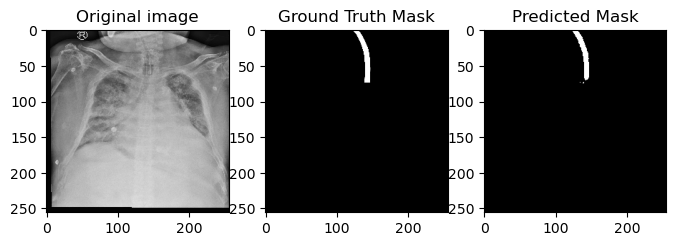

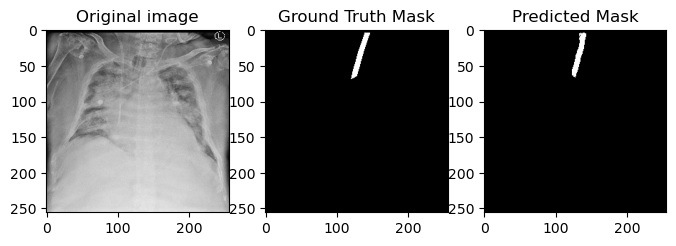

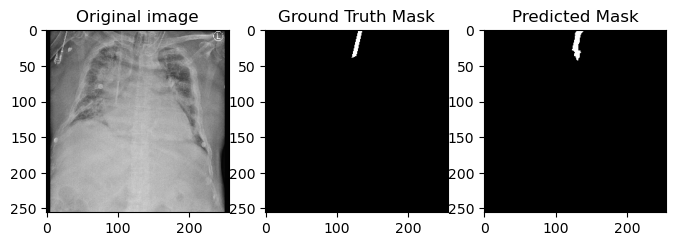

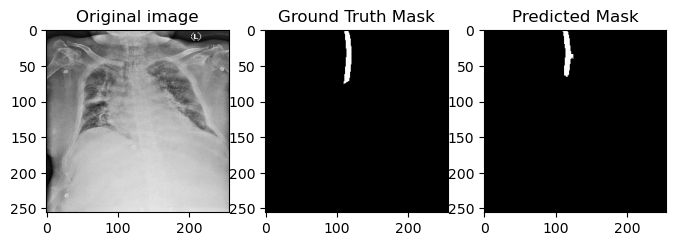

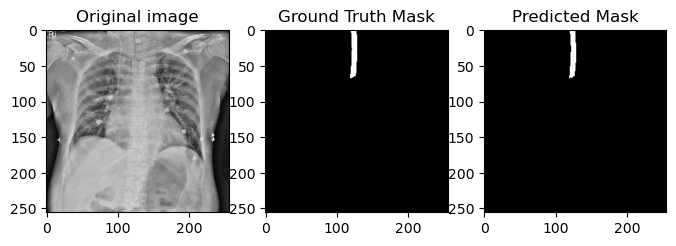

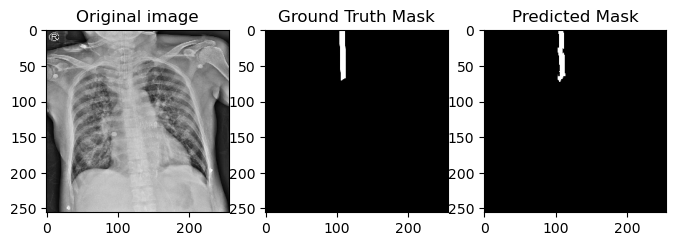

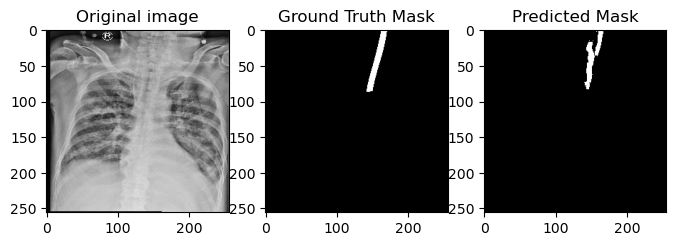

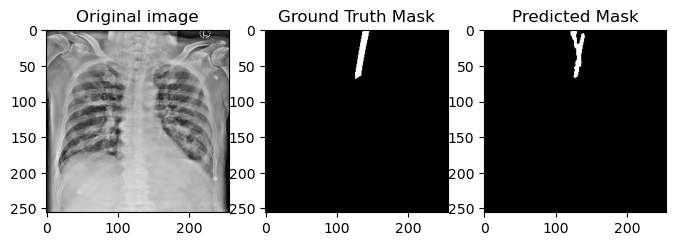

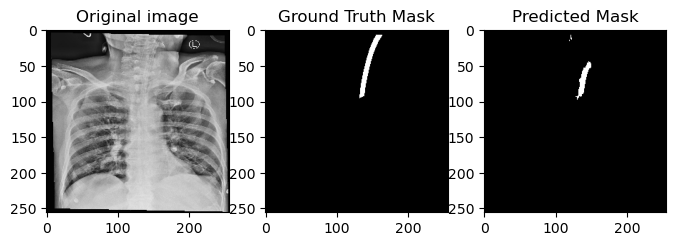

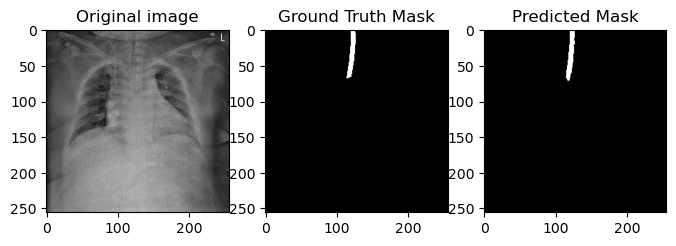

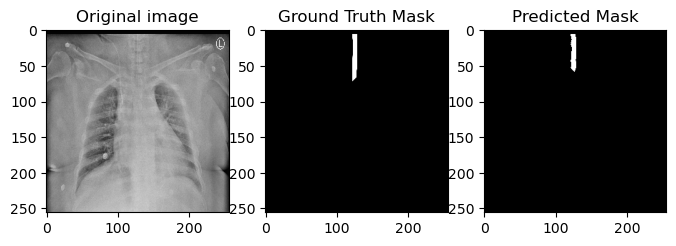

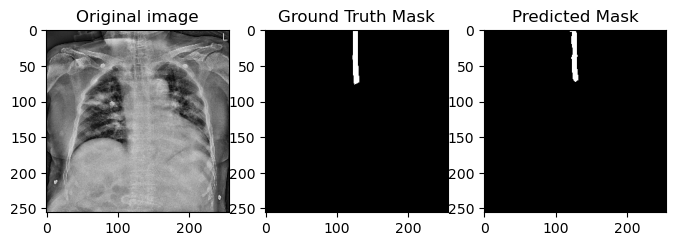

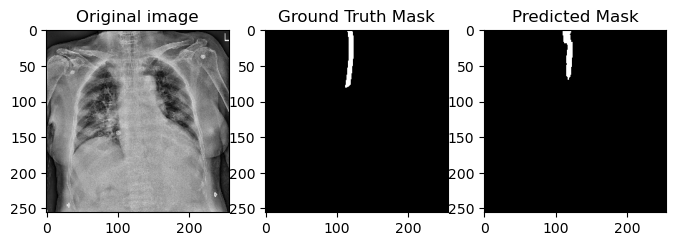

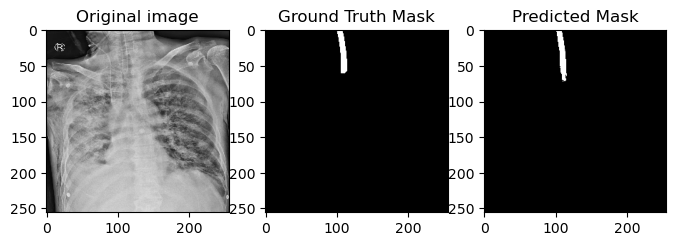

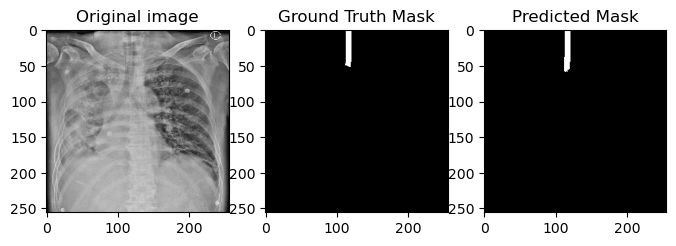

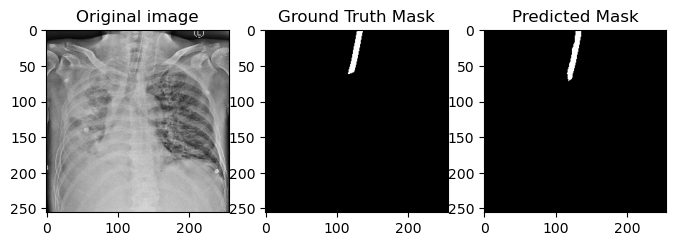

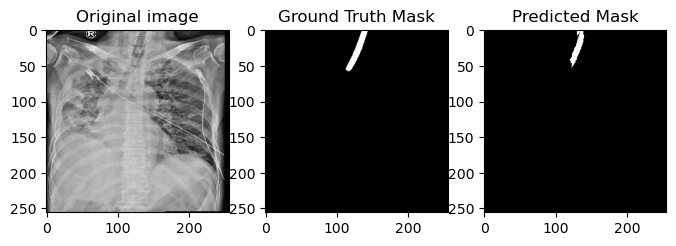

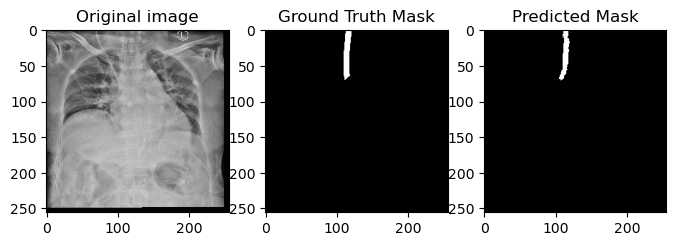

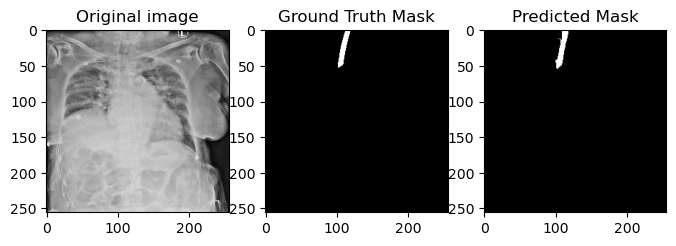

In [36]:
for i in range(len(y_pred)):
  plt.figure(figsize=(8,8))
  plt.subplot(1,3,1)
  plt.imshow(test[i],cmap='gray')
  plt.title('Original image')
  
  plt.subplot(1,3,2)
  plt.imshow(test_label[i][:,:,0],cmap='gray')
  plt.title('Ground Truth Mask')

  plt.subplot(1,3,3)
  plt.imshow(y_pred[i][:,:,0],cmap='gray')
  plt.title('Predicted Mask')
  plt.show()

In [ ]:
loss = history.history['numpy_mean_iou']
val_loss = history.history['val_numpy_mean_iou']

plt.figure()
plt.plot(history.epoch, loss, 'r', label='numpy_mean_iou')
plt.plot(history.epoch, val_loss, 'bo', label='val_numpy_mean_iou')
plt.title('Unet++Training and Validation iou')
plt.xlabel('Epoch')
plt.ylabel('iou Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
# # 做kfol
# #     max_indices=np.argmax(y_true,axis=0)#取得y的最大值的位置
# # 我們必須要先將我們的結果(y_true,y_pred)resize成原始大小，，再來得到端點位置，再對x和y除以72，再使用歐氏距離，判斷是否大於0.5
# # 原始大小我們可以透過os.listdir.sort(原img)取得，然後用新的陣列去接值
# def mean_error_in_cm(y_true,y_pred):
#     for i in range(len(y_pred)):
#     turn_y=y_pred[i].reshape(256,256)
#     x,y=np.where(turn_y==np.max(turn_y))
#     print(np.max(x),np.max(y))#代表我們得到每張圖的最低點



In [ ]:
# print(y_pred.shape)
# print(test_label.shape)

In [ ]:
# 要先判斷是否是灰階圖y_pred or y_true
# for i in range(len(y_pred)):
#     # Find the top 20 corners using the cv2.goodFeaturesToTrack()
#     corners = cv2.goodFeaturesToTrack(y_pred[i],5,0.01,10)
#     print(i)
#     corners = np.int0(corners)
 
# # Iterate over the corners and draw a circle at that location
# for i in corners:
#     x,y = i.ravel()
#     cv2.circle(img,(x,y),5,(0,0,255),-1)
    
# # Display the image
# cv2.imshow('a', img)
# cv2.waitKey(0)